In [1]:
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

H:\env\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


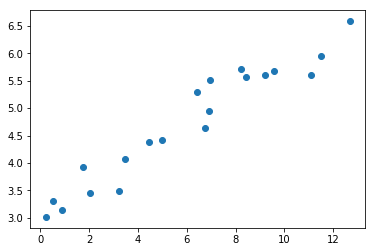

In [3]:
X = np.linspace(0, 12, 20).reshape(-1, 1) + np.random.randn(20, 1)*0.4

y = np.linspace(3, 6, 20).reshape(-1, 1) + np.random.randn(20, 1)*0.3

plt.scatter(X, y)

In [5]:
y.shape

(20, 1)

In [6]:
X.shape

(20, 1)

In [12]:
# f(X) = w*x +b
# 占位符
X_ = tf.placeholder(dtype=tf.float32, shape=[20, 1])

Y_ = tf.placeholder(dtype=tf.float32, shape=[20, 1])

W = tf.Variable(initial_value=np.random.randn(1, 1), dtype=tf.float32)

b = tf.Variable(initial_value=np.random.normal(size=[1]), dtype=tf.float32)

In [13]:
# 写方程

pred = tf.matmul(X_, W) + b
# pred预测

In [14]:
# 损失函数
# 20个样本求平均,每一个样本最小二乘法
cost = tf.reduce_mean(tf.pow(pred-Y_, 2))

In [15]:
# cost值越小,说明pred中W, b越接近
# 梯度下降
opt = tf.train.GradientDescentOptimizer(0.01)

optimizer = opt.minimize(cost)

In [16]:
with tf.Session() as sess:
    # 初始化, 变量
    sess.run(tf.global_variables_initializer())
    
    for i in range(1000):
        optimizer_, cost_  = sess.run(fetches = [optimizer, cost], feed_dict = {X_: X, Y_: y})
        if i % 10 == 0:
            print(i, cost_)
            
    w_, b_ = sess.run(fetches=[W, b])
    print(w_, b_)

0 3.8781617
10 0.52272904
20 0.4758924
30 0.4339828
40 0.3964818
50 0.36292592
60 0.33289996
70 0.30603248
80 0.28199157
90 0.26047933
100 0.24123022
110 0.22400615
120 0.2085938
130 0.19480298
140 0.18246292
150 0.1714208
160 0.16154039
170 0.15269922
180 0.14478812
190 0.13770922
200 0.13137524
210 0.12570737
220 0.120635726
230 0.11609771
240 0.11203704
250 0.108403504
260 0.105152175
270 0.1022429
280 0.09963969
290 0.09731038
300 0.09522602
310 0.0933609
320 0.091692165
330 0.0901988
340 0.08886253
350 0.087666854
360 0.08659697
370 0.08563967
380 0.084783
390 0.08401655
400 0.08333064
410 0.0827169
420 0.08216772
430 0.0816763
440 0.081236616
450 0.08084322
460 0.08049111
470 0.08017615
480 0.07989423
490 0.079642
500 0.07941632
510 0.07921438
520 0.07903365
530 0.07887196
540 0.07872729
550 0.07859778
560 0.07848193
570 0.07837831
580 0.078285545
590 0.07820257
600 0.078128256
610 0.078061774
620 0.07800234
630 0.077949174
640 0.07790153
650 0.07785896
660 0.07782079
670 0.07778

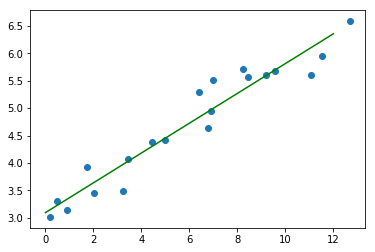

In [17]:
plt.scatter(X, y)

x = np.linspace(0, 12, 100)

plt.plot(x, w_[0, 0]*x + b_[0], color='green')